## Consigna 1

In [1]:
!pip install inline_sql


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from inline_sql import sql, sql_val
import matplotlib.pyplot as plt
#Importamos los datos descargados
data = pd.read_csv('/work/tabla_nutricional.csv',delimiter = ';')


### rellenamos las filas vacías con ceros

In [3]:
data.fillna(0, inplace=True)
data

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (mg),Ca (mg),Fe (mg),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,153.900,283.50,0.189,0.00,4.990,2.190,0.520,0.00
1,Leche entera en polvo,11.00,4.510,2.840,2.730,44.440,99.00,0.060,0.00,1.620,0.770,0.060,0.00
2,Yogurt,19.00,2.450,0.510,0.490,7.990,17.67,0.005,0.00,0.320,0.140,0.014,0.00
3,Queso crema,1.66,0.060,0.100,0.370,1.230,0.93,0.000,0.00,0.360,0.110,0.010,0.00
4,Queso cuartirolo,3.66,0.060,0.770,0.800,20.840,16.54,0.000,0.00,0.760,0.210,0.020,0.00
5,Queso rallar,1.66,0.060,0.550,0.450,20.420,15.78,0.000,0.00,0.360,0.110,0.008,0.00
6,Huevo,16.00,0.000,1.920,1.890,21.600,8.96,0.400,0.00,0.510,0.720,0.460,0.00
7,Asado,50.00,0.000,9.300,7.500,33.000,7.50,1.120,0.00,2.930,3.270,0.189,0.00
8,Paleta,15.00,0.000,3.000,1.500,9.900,1.80,0.340,0.00,0.880,0.980,0.056,0.00
9,Hueso c/carne,15.00,0.000,3.000,1.500,9.900,1.80,0.340,0.00,0.880,0.980,0.056,0.00


### ponemos todas las columnas en la misma unidad (gramos)

In [4]:
data['Na (mg)'] = data['Na (mg)'] * 0.001
data['Ca (mg)'] = data['Ca (mg)'] * 0.001
data['Fe (mg)'] = data['Fe (mg)'] * 0.001

In [5]:
 data.rename(columns={
    'Na (mg)': 'Na (gr)',
    'Ca (mg)': 'Ca (gr)',
    'Fe (mg)': 'Fe (gr)'
}, inplace=True)


In [6]:
data

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.153900,0.28350,0.000189,0.00,4.990,2.190,0.520,0.00
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.044440,0.09900,0.000060,0.00,1.620,0.770,0.060,0.00
2,Yogurt,19.00,2.450,0.510,0.490,0.007990,0.01767,0.000005,0.00,0.320,0.140,0.014,0.00
3,Queso crema,1.66,0.060,0.100,0.370,0.001230,0.00093,0.000000,0.00,0.360,0.110,0.010,0.00
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.020840,0.01654,0.000000,0.00,0.760,0.210,0.020,0.00
5,Queso rallar,1.66,0.060,0.550,0.450,0.020420,0.01578,0.000000,0.00,0.360,0.110,0.008,0.00
6,Huevo,16.00,0.000,1.920,1.890,0.021600,0.00896,0.000400,0.00,0.510,0.720,0.460,0.00
7,Asado,50.00,0.000,9.300,7.500,0.033000,0.00750,0.001120,0.00,2.930,3.270,0.189,0.00
8,Paleta,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00


In [7]:
tablaOMS = pd.read_csv('/work/tabla_OMS.csv')
tablaOMS

,Factor alimentario,Meta ( % de la energía total)
0,Grasas totales,15-30 %
1,Acidos grasos saturados,<10 %
2,Acidos grasos poliinsaturados (AGPI),6-10 %
3,Acidos grasos poliinsaturados n-6,5-8 %
4,Acidos grasos poliinsaturados n-3,1-2 %
5,Acidos grasos trans,<1 %
6,Acidos grasos monoinsaturados,Por diferencia
7,Carbohidratos totales,55-75 %b
8,Azúcares libres,<10 %
9,Proteínas,10-15 %


# Consigna 2

In [8]:
import pandas as pd
frutasyverduras = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 
                     'Manzana', 'Naranja', 'Mandarina', 'Pera', 'Banana', 'Papa', 'Batata', 
                     'Jugo conc.', 'Tomate envasado']
def frutas_y_verduras(df):
    suma = 0
    for indice, fila in df.iterrows():
        alimento = fila['Alimento']
        cantidad = fila['Cantidad (gr/ml)']
        if alimento in frutasyverduras:
            suma += cantidad
    return suma

frutas_y_verduras(data)

673.0

In [9]:


def cumple_margenes_oms(df):
    # Calcular la sumatoria total de los nutrientes
    sumatoriatotal = (
        df['HC (gr)'].sum() +
        df['Proteinas (gr)'].sum() +
        df['Grasas (gr)'].sum() +  # Solo sumamos la columna de grasas totales
        df['Na (gr)'].sum() +
        df['Fibra (gr)'].sum() +
        df['Azucares Libres (gr)'].sum() +  
        df['Ca (gr)'].sum() +
        df['Fe (gr)'].sum() 

    )

    # Calcular porcentajes
    porcentaje_proteinas = df['Proteinas (gr)'].sum() * 100 / sumatoriatotal
    porcentaje_hc = df['HC (gr)'].sum() * 100 / sumatoriatotal
    porcentaje_grasas = df['Grasas (gr)'].sum() * 100 / sumatoriatotal

    # Calcular cantidades
    cantidad_na = df['Na (gr)'].sum()
    cantidad_fibra = df['Fibra (gr)'].sum()
    frutas_verduras = frutas_y_verduras(df)

    # Condiciones
    condicion_proteinas = 10 <= porcentaje_proteinas <= 15
    condicion_hc = 55 <= porcentaje_hc <= 75
    condicion_grasas = 15 <= porcentaje_grasas <= 30
    condicion_na = cantidad_na == 0.2
    condicion_fibra = cantidad_fibra > 25
    condicion_frutas_verduras = frutas_verduras >= 400

    # Imprimir resultados
    print(f"{'Cumple' if condicion_proteinas else 'No cumple'} condición proteinas, ya que su porcentaje es {porcentaje_proteinas:.2f}")
    print(f"{'Cumple' if condicion_hc else 'No cumple'} condición hc, ya que su porcentaje es {porcentaje_hc:.2f}")
    print(f"{'Cumple' if condicion_grasas else 'No cumple'} condición grasas, ya que su porcentaje es {porcentaje_grasas:.2f}")
    print(f"{'Cumple' if condicion_na else 'No cumple'} condición na, ya que su cantidad es {cantidad_na:.2f}")
    print(f"{'Cumple' if condicion_fibra else 'No cumple'} condición fibra, ya que su cantidad es {cantidad_fibra:.2f}")
    print(f"{'Cumple' if condicion_frutas_verduras else 'No cumple'} condición frutas y verduras, ya que su cantidad es {frutas_verduras:.2f}")

    # Devolver resultado final
    if all([condicion_proteinas, condicion_hc, condicion_grasas, condicion_na, condicion_fibra, condicion_frutas_verduras]):
        return 'Verdadero, cumple todos los margenes'
    else:
        return 'Falso, no cumple todos los margenes'

cumple_margenes_oms(data)


No cumple condición proteinas, ya que su porcentaje es 16.49
Cumple condición hc, ya que su porcentaje es 60.18
No cumple condición grasas, ya que su porcentaje es 11.28
No cumple condición na, ya que su cantidad es 3.34
No cumple condición fibra, ya que su cantidad es 21.26
Cumple condición frutas y verduras, ya que su cantidad es 673.00


'Falso, no cumple todos los margenes'

# Consigna 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
#tomamos como que el dataframe que entra es el que ya paso por el punto 1 (es decir con todas las unidades en gramos y las celdas vacias con ceros)     
def matriz_porgramo (df): 
    consumo_normalizado= df.copy()

    # Crear una copia de la columna 'Alimento' antes de eliminarla
    alimentos = consumo_normalizado['Alimento'].copy()

    # Iteramos sobre cada fila del DataFrame
    for index, row in consumo_normalizado.iterrows():
        # Tomamos la cantidad de gramos/ml del alimento en la fila actual
        cantidad = row['Cantidad (gr/ml)']
        
        # Normalizamos los valores nutricionales dividiendo por la cantidad
        consumo_normalizado.loc[index, 'Cantidad (gr/ml)'] /= cantidad
        consumo_normalizado.loc[index, 'HC (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'Proteinas (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'Grasas (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'Na (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'Ca (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'Fe (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'Azucares Libres (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'AGS (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'AGNI (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'AG p (gr)'] /= cantidad
        consumo_normalizado.loc[index, 'Fibra (gr)'] /= cantidad

    consumo_normalizado = consumo_normalizado.drop(columns=['Alimento'])

    # Mostramos el DataFrame normalizado
    return consumo_normalizado, alimentos

matriz_porgramo(data)

(    Cantidad (gr/ml)   HC (gr)  Proteinas (gr)  Grasas (gr)   Na (gr)  \
 0                1.0  0.046000        0.031000     0.029000  0.000570   
 1                1.0  0.410000        0.258182     0.248182  0.004040   
 2                1.0  0.128947        0.026842     0.025789  0.000421   
 3                1.0  0.036145        0.060241     0.222892  0.000741   
 4                1.0  0.016393        0.210383     0.218579  0.005694   
 5                1.0  0.036145        0.331325     0.271084  0.012301   
 6                1.0  0.000000        0.120000     0.118125  0.001350   
 7                1.0  0.000000        0.186000     0.150000  0.000660   
 8                1.0  0.000000        0.200000     0.100000  0.000660   
 9                1.0  0.000000        0.200000     0.100000  0.000660   
 10               1.0  0.000000        0.200000     0.100000  0.000660   
 11               1.0  0.000000        0.212059     0.014118  0.000630   
 12               1.0  0.060000       

In [12]:
import numpy as np
import pandas as pd



def calculoACP(df):
    data, alimentos = matriz_porgramo(df) 
    d, n = data.shape
    m = np.mean(data, axis=0)

    # Matriz con la media restada
    X = data - m  # Se resta la media directamente ya que m es un vector

    # Matriz de covarianza
    Mcov = np.dot(X.T, X) / n

    # Autovalores y autovectores
    D, V = np.linalg.eigh(Mcov)

    # Ordenamos los autovalores de mayor a menor
    idx = np.argsort(-D)
    D = D[idx]
    V = V[:, idx]

    # Matriz de proyección
    matriz_proyeccion = np.dot(X, V)
    
    return  D, V, X, m, alimentos


calculoACP(data)

(array([5.26683358e-01, 2.88492328e-01, 9.54621517e-02, 4.61959113e-02,
        2.16969631e-02, 1.70713101e-02, 2.32029197e-03, 7.81388387e-04,
        2.32708242e-04, 8.00117266e-06, 6.07094846e-10, 0.00000000e+00]),
 array([[-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [-7.80433987e-01,  2.15232426e-01,  5.78481788e-01,
         -5.65761027e-02,  6.63092957e-02, -3.42785889e-02,
          7.60789695e-03,  1.21407530e-02,  3.12814840e-02,
          8.42079914e-05,  1.12849319e-05,  0.00000000e+00],
        [ 1.89810336e-02, -1.58198638e-02,  1.85939653e-01,
          6.65353033e-01, -7.16094201e-01,  8.20591008e-02,
          1.65878995e-02, -2.75942635e-02, -3.82549262e-02,
          9.82739404e-03,  1.38546714e-04,  0.00000000e+00],
        [ 2.72255000e-01,  8.13468269e-01,  7.07428617e-02,

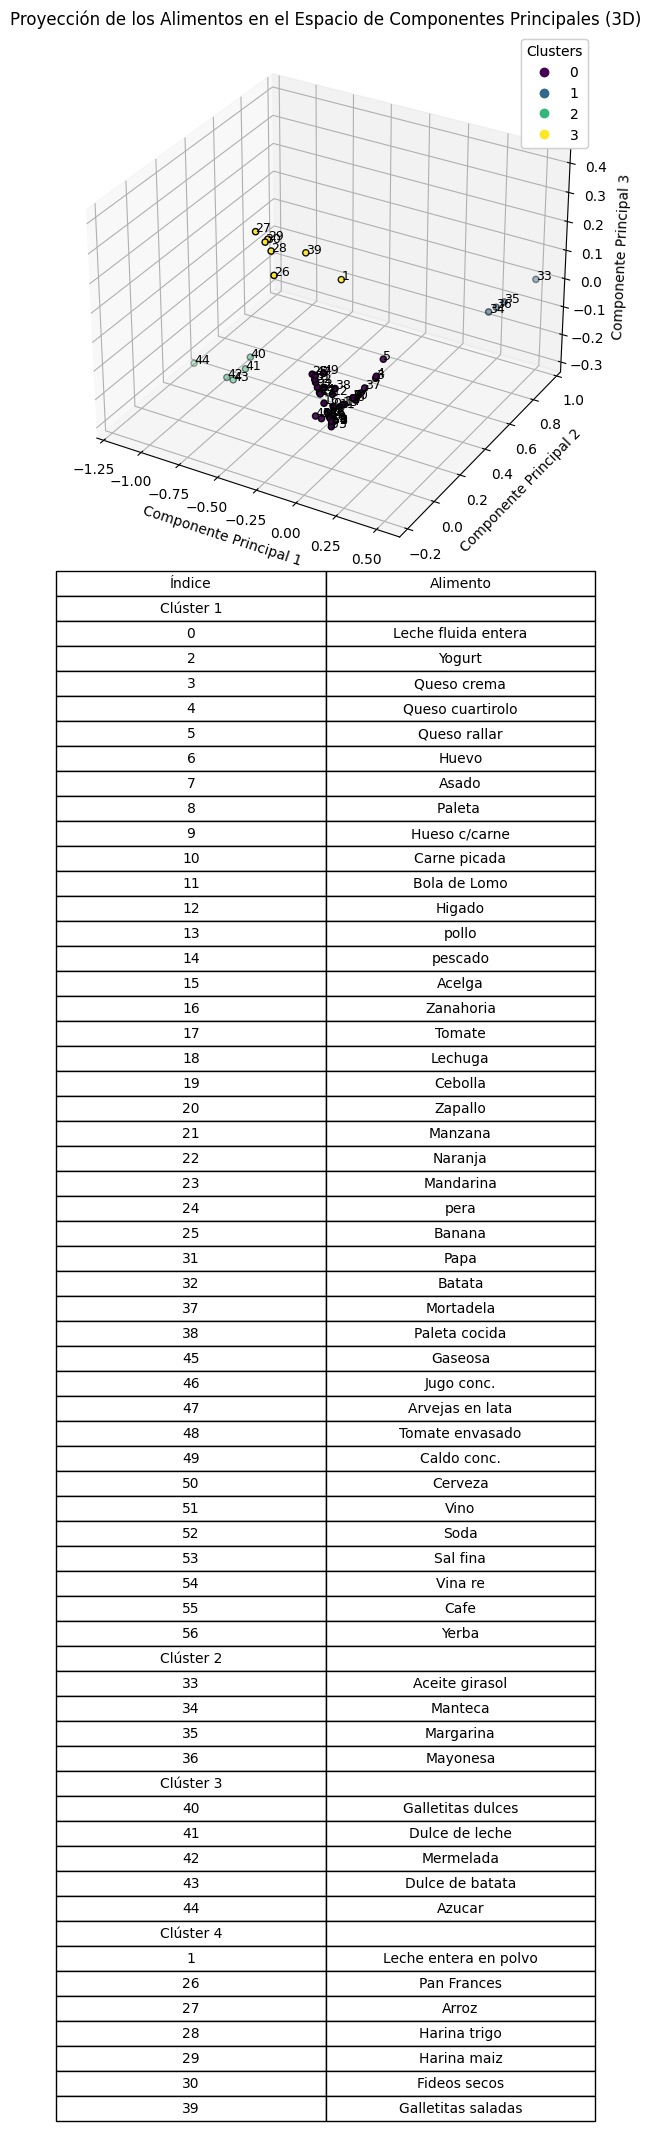

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 1, 1, 1, 1, 0, 0, 3, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def graficarACP3D(df):
    # Calcular ACP y obtener la lista de alimentos
    D, V, X, m, alimentos = calculoACP(df)
    
    # Proyectar los datos en los tres primeros componentes principales
    X_pca = np.dot(X, V[:, :3])

    # Clustering con k-means para 4 clusters
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X_pca)
    labels = kmeans.labels_

    # Crear la figura y el gráfico 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot de los puntos con color según el clúster
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', edgecolors='k')

    # Añadir números (índices) a los puntos
    for i in range(len(alimentos)):
        ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], str(i), fontsize=9)

    # Etiquetas de los ejes y título del gráfico
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    ax.set_title('Proyección de los Alimentos en el Espacio de Componentes Principales (3D)')

    # Añadir barra de colores para los clústeres
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Crear tabla de asociación entre índices y nombres de alimentos, agrupados por clúster
    table_data = []
    for cluster in range(4):
        # Añadir una fila que indica el clúster
        table_data.append([f"Clúster {cluster+1}", ""])
        # Añadir los alimentos que pertenecen a este clúster
        for i in range(len(alimentos)):
            if labels[i] == cluster:
                table_data.append([i, alimentos[i]])

    col_labels = ['Índice', 'Alimento']
    table = ax.table(cellText=table_data, colLabels=col_labels, loc='bottom', cellLoc='center')

    # Ajustar la tabla para que no se superponga con el gráfico
    table.scale(1, 1.5)

    plt.show()

    return labels

# Ejemplo de uso
# Suponiendo que `data` es tu DataFrame original
graficarACP3D(data)


En la tabla que generamos debajo del grafico podemos ver que alimentos se encuentran en cada cluster. Asi, podemos analizar que representan estos clusteres de la proyeccion en tres dimensiones de los componentes principales y que conclusion podemos sacar de los mismos. 

Suponemos que deberían estar agrupados por semejanzas nutricionales. Esto lo podemos notar tanto en el cluster 2 como en el 3 y el 4. En el cluster 1 (aceite girasol, manteca, margarina, mayonesa) vemos que son todos alimentos oleosos, que contienen altos niveles de grasas. Asimismo en el cluster 3 (galletitas dulces, dulce de leche, mermelada, dulce de batata y azucar) notamos que son muy semejantes ya que todos poseen altos niveles de azucares. Por ultimo en el cluster 4 (leche entera en polvo, pan francés, arroz, harina trigo, harina maiz, fideos secos, galletitas saladas) tambien podemos ver semejanzas ya que todos estos alimentos son una gran fuente de carbohidratos, todos aportan gran cantidad de calorias y energia.

En cambio, notamos que el cluster 1es especialmente diverso, ya que alli se encuentran tanto grupos de alimentos muy similares, como tambien muy distintos. Por ejemplo, tenemos todas las frutas y verduras que son ricas en vitaminas, minerales y fibras. Tambien tenemos las carnes, que poseen altos niveles de proteinas, y tambien los lacteos que son grupos que poseen caracteristicas en comun entre si. Por lo cual podemos notar que dentro del cluster podriamos hacer mas divisiones internamente por grupos con semenanzas nutricionales como los ya nombrados. Por otro lado nos encontramos alimentos que estan fuera de estos gruopos tales como gaseosa, cerveza, sal fina.  Por lo tanto, este cluster no nos es tan facil de categorizar por si mismo, al tener muchos alimentos tan variados dentro.

En conclusion, los clusteres vistos en la proyeccion de los componentes principales en tres dimensiones, en un  caso agrupa de manera mas amplia de la cual nos es dificil sacar caracteristicas comunes, pero en los otros nos puede dar mucha informacion ya que agrupa correctamentepor semejanzas nutricionales.

### vemos la varianza explicada para asegurar que los tres primeros componentes tengan la mayor parte de la informacion

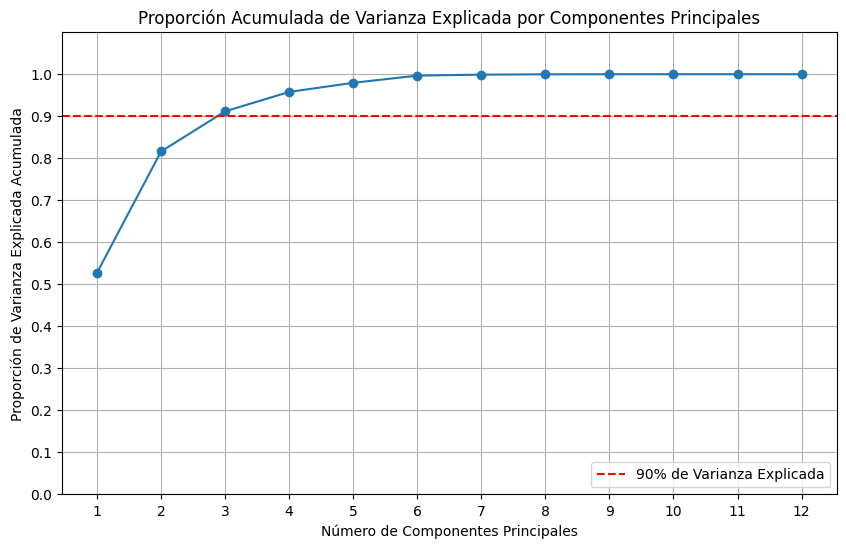

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Calcular el ACP

D, V, X, m, alimentos = calculoACP(data)
def graficar_proporcion_varianza_explicada_acp(D):

    # Calcular la varianza explicada por cada componente
    varianza_explicada = D / np.sum(D)

    # Calcular la proporción acumulada de varianza explicada
    varianza_acumulada = np.cumsum(varianza_explicada)

    # Graficar proporción acumulada de varianza explicada
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-')
    plt.xlabel('Número de Componentes Principales')
    plt.ylabel('Proporción de Varianza Explicada Acumulada')
    plt.title('Proporción Acumulada de Varianza Explicada por Componentes Principales')
    plt.grid(True)
    plt.xticks(range(1, len(varianza_acumulada) + 1))
    plt.ylim(0, 1.1)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.axhline(y=0.90, color='r', linestyle='--', label='90% de Varianza Explicada')
    plt.legend(loc='lower right')
    plt.show()


# Graficar proporción acumulada de varianza explicada
graficar_proporcion_varianza_explicada_acp(D)


En esta parte nos fijamos la varianza explicada dependiendo de la cantidad de componentes principales para saber cuantos nos conviene tomar para que sean los que poseen la mayor cantidad de informacion. 

Vemos que tomando los primeros tres componentes principales, obtenemos el 90% de información y que luego no vale la pena seguir tomando mas ya que crece muy poco esa cantidad de información obtenida. Y que tomando solo 2 componentes perdíamos un 10% de informacion, asi que nos decidimos por hacer el analisis con 3 componentes principales siendo lo mas conveniente. Tambien notamos que tomar 3 componentes nos es util para poder graficarlo y entenderlo asi graficamente.

# Consigna 4

Proyectamos los alimentos de la tabla de Consumidores libres en el espacio de generadores del ACP. Pero primero antes de proyectarlos hacemos un cambio de nombres para que coincidan las etiquetas de los alimentos en la tabla de consumidores libres con la tabla nutricional sobre la que hicimos la proyeccion en el punto 3.

In [15]:

nombres_correctos = pd.read_csv('consumidores_libres.csv', sep=';')
equivalencias = {
    'ACEITE COCINERO GIRASOL':'Aceite girasol',
    'ARROZ GRANO FINO':'Arroz',
    'AZUCAR LEDESMA': 'Azucar',
    'FIDEOS GUISEROS': 'Fideos secos',
    'HARINA DE TRIGO':'Harina trigo',
    'HUEVOS COLOR DOCENA': 'Huevo',
    'PAN FRESCO': 'Pan Frances',
    'LECHE c/VIT.FORT': 'Leche fluida entera',
    'YERBA TARAGUI' : 'Yerba',
    'ZANAHORIAS' : 'Zanahoria',
    'TOMATE PERITA': 'Tomate',
    'CEBOLLA': 'Cebolla',
    'PAPA NEGRA': 'Papa',
    'ACELGA PAQUETE': 'Acelga',
    'NARANJA':'Naranja',
    'MANZANA' :'Manzana',
    'BOLA DE LOMO': 'Bola de Lomo',
    'ASADO':'Asado',
    'CARNE PICADA COMUN':'Carne picada',

    'BERENJENAS':'Berenjenas',
}
nombres_correctos.at[19,'PRODUCTOS'] = 'Paleta'
nombres_correctos['PRODUCTOS'] = nombres_correctos['PRODUCTOS'].replace(equivalencias)


nombres_correctos


,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Aceite girasol,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,Arroz,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,Azucar,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,Fideos secos,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,Harina trigo,1000,950.0,1250.0,1350.0,1500.0,1690.0
5,Huevo,720,2200.0,2600.0,3000.0,3400.0,3800.0
6,Pan Frances,1000,1650.0,2100.0,2200.0,2300.0,2300.0
7,Leche fluida entera,1000,1100.0,1210.0,1620.0,1890.0,1990.0
8,Yerba,1000,2800.0,3700.0,4600.0,4950.0,5500.0
9,Zanahoria,1000,820.0,990.0,1100.0,1100.0,1100.0


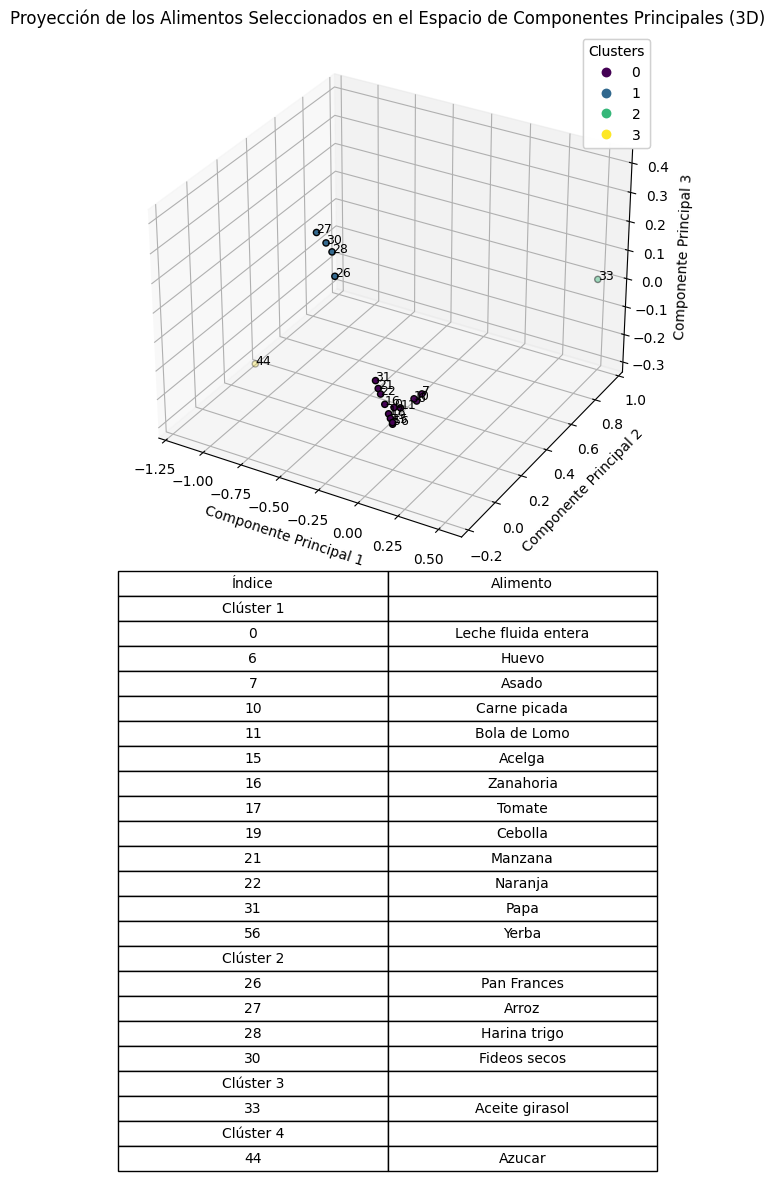

In [16]:
def graficarACP3D(df, nombres_correctos_df):
    # Extraer los nombres de alimentos de la columna 'PRODUCTOS' del DataFrame nombres_correctos_df
    nombres_correctos = nombres_correctos_df['PRODUCTOS'].tolist()
    
    # Calcular ACP y obtener la lista de alimentos
    D, V, X, m, alimentos = calculoACP(df)
    
    # Proyectar los datos en los tres primeros componentes principales
    X_pca = np.dot(X, V[:, :3])
    
    # Obtener los índices de los alimentos que están en la lista nombres_correctos
    indices_correctos = [i for i, nombre in enumerate(alimentos) if nombre in nombres_correctos]
    
    # Filtrar la matriz PCA para incluir solo los alimentos seleccionados
    X_pca_filtrado = X_pca[indices_correctos]
    
    if X_pca_filtrado.shape[0] == 0:
        print("No se encontraron alimentos de nombres_correctos en el DataFrame.")
        return
    
    # Clustering con k-means para 4 clusters
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X_pca_filtrado)
    labels = kmeans.labels_

    # Crear la figura y el gráfico 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(X_pca_filtrado[:, 0], X_pca_filtrado[:, 1], X_pca_filtrado[:, 2], c=labels, cmap='viridis', edgecolors='k')

    # Añadir números (índices) a los puntos en el gráfico
    for i in range(len(indices_correctos)):
        ax.text(X_pca_filtrado[i, 0], X_pca_filtrado[i, 1], X_pca_filtrado[i, 2], str(indices_correctos[i]), fontsize=9)

    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    ax.set_title('Proyección de los Alimentos Seleccionados en el Espacio de Componentes Principales (3D)')

    # Añadir barra de colores para los clusters
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Crear tabla de asociación entre índices y nombres de alimentos, agrupados por clúster
    table_data = []
    for cluster in range(4):
        table_data.append([f"Clúster {cluster+1}", ""])
        for i in range(len(indices_correctos)):
            if labels[i] == cluster:
                table_data.append([indices_correctos[i], alimentos[indices_correctos[i]]])

    col_labels = ['Índice', 'Alimento']
    table = ax.table(cellText=table_data, colLabels=col_labels, loc='bottom', cellLoc='center')

    # Ajustar la tabla para que no se superponga con el gráfico
    table.scale(1, 1.5)

    plt.show()
graficarACP3D(data, nombres_correctos)


# Consigna 5

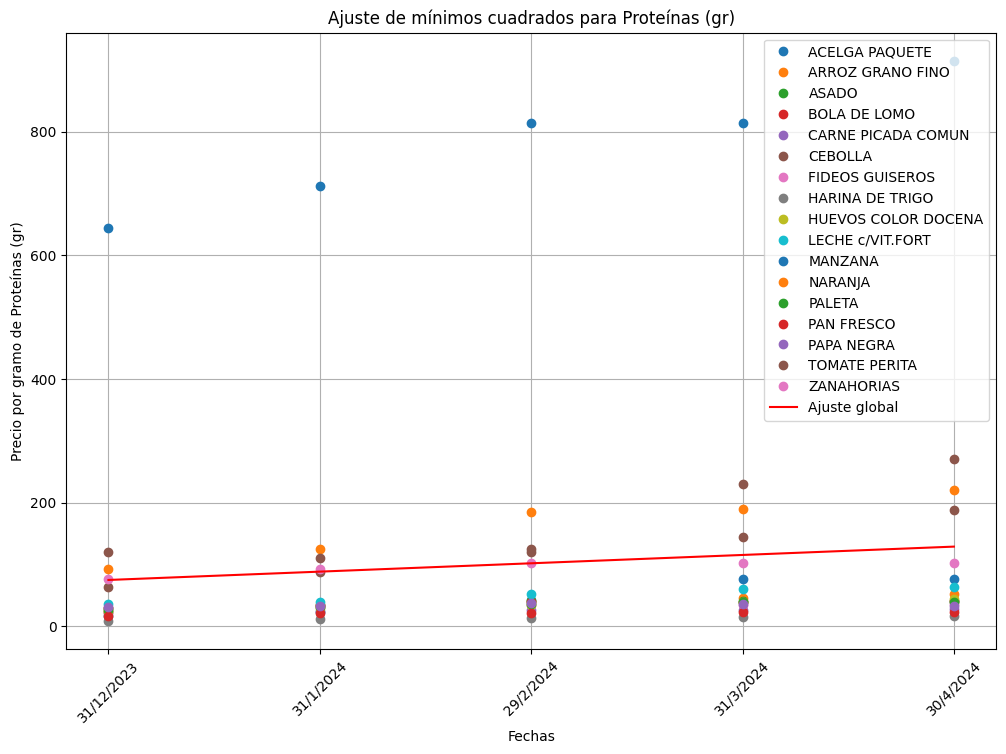

Pendiente de Proteínas (gr): 13.486180022917965


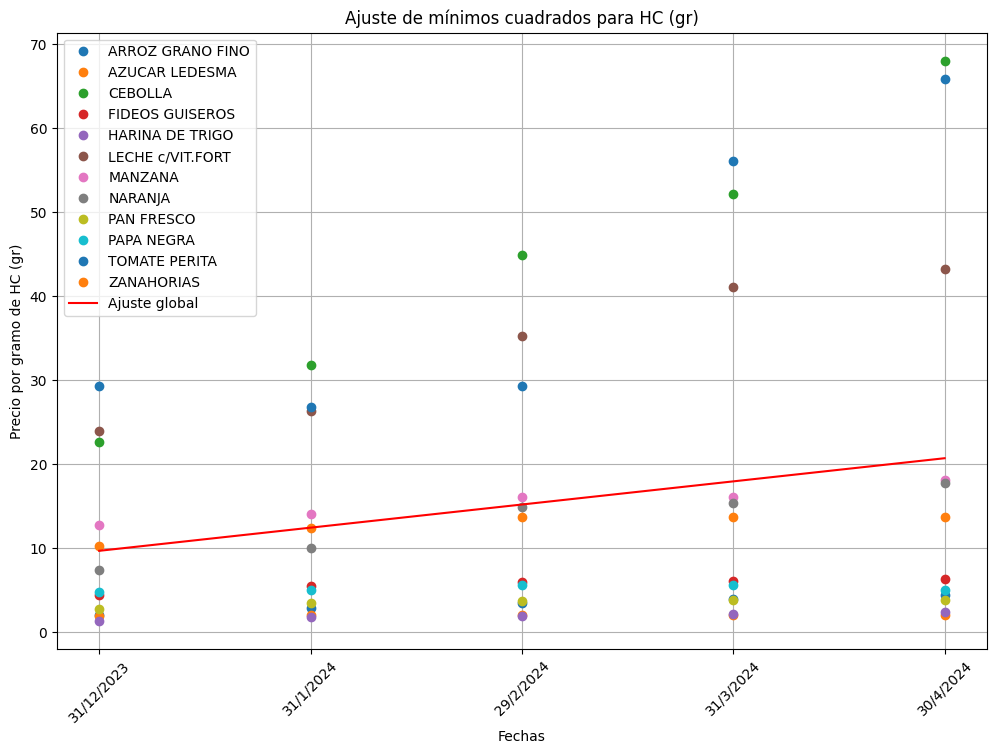

Pendiente de HC (gr): 2.755369240959548


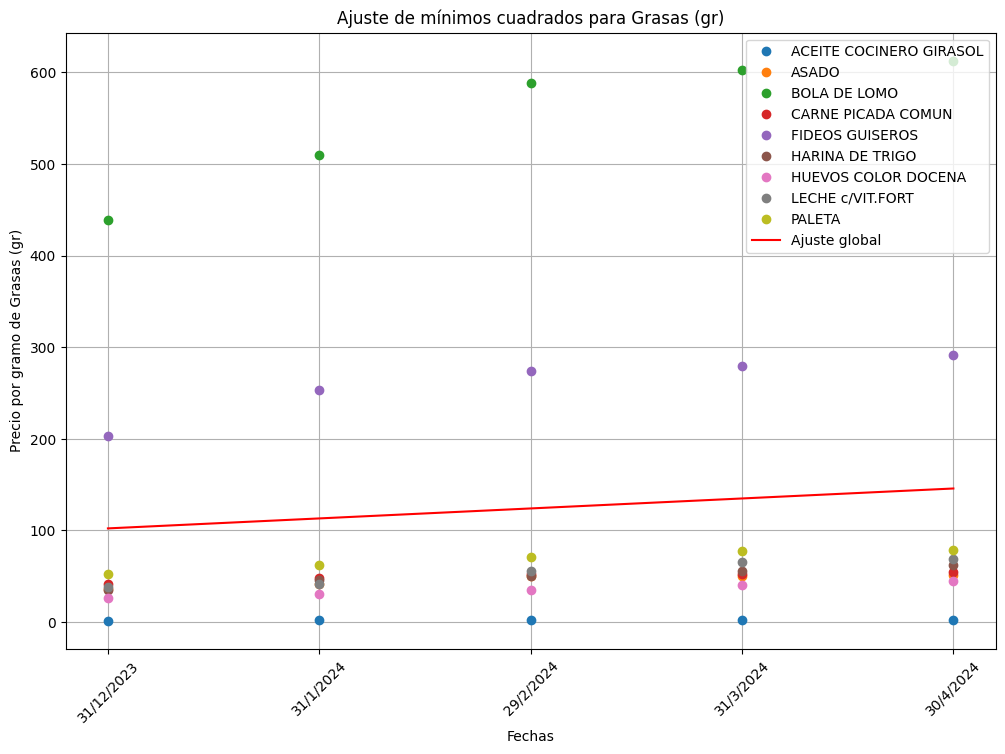

Pendiente de Grasas (gr): 10.88512470764454


In [17]:
# Llevar todo a un gramo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from inline_sql import sql

# Leer el archivo CSV
df = pd.read_csv("/work/consumidores_libres.csv", delimiter=';')

def llevar_a_un_gramo(df):
    for indice, fila in df.iterrows():
        # Obtener la cantidad original de la fila
        cantidad_original = fila['Cantidad']
        # Iterar sobre las columnas excepto 'Cantidad' y 'PRODUCTOS'
        for columna in df.columns.difference(['Cantidad', 'PRODUCTOS']):
            # Dividir el valor original de la columna por la cantidad original
            df.at[indice, columna] /= cantidad_original
        # Asignar el valor 1 a la columna 'Cantidad'
        df.at[indice, 'Cantidad'] = 1
    return df

def llevar_a_un_gramo2(data):
    for indice, fila in data.iterrows():
        # Obtener la cantidad original de la fila
        cantidad_original = fila['Cantidad (gr/ml)']
        # Iterar sobre las columnas excepto 'Cantidad' y 'PRODUCTOS'
        for columna in data.columns.difference(['Alimento', 'Cantidad (gr/ml)']):
            # Dividir el valor original de la columna por la cantidad original
            data.at[indice, columna] /= cantidad_original
        # Asignar el valor 1 a la columna 'Cantidad'
        data.at[indice, 'Cantidad (gr/ml)'] = 1
    return data

aumentos_por_gramo = llevar_a_un_gramo(df)
nutrientes_por_gramo = llevar_a_un_gramo2(pd.read_csv("/work/tabla_nutricional.csv", delimiter=';'))

equivalencias = {
    'Aceite girasol': 'ACEITE COCINERO GIRASOL',
    'Arroz': 'ARROZ GRANO FINO',
    'Azucar': 'AZUCAR LEDESMA',
    'Fideos secos': 'FIDEOS GUISEROS',
    'Harina trigo': 'HARINA DE TRIGO',
    'Huevo': 'HUEVOS COLOR DOCENA',
    'Pan Frances': 'PAN FRESCO',
    'Leche fluida entera': 'LECHE c/VIT.FORT',
    'Yerba taragui': 'YERBA TARAGUI',
    'Zanahoria': 'ZANAHORIAS',
    'Berengena': 'BERENJENAS',
    'Tomate': 'TOMATE PERITA',
    'Cebolla': 'CEBOLLA',
    'Papa': 'PAPA NEGRA',
    'Acelga': 'ACELGA PAQUETE',
    'Naranja': 'NARANJA',
    'Manzana': 'MANZANA',
    'Bola de lomo': 'BOLA DE LOMO',
    'Asado': 'ASADO',
    'Carne picada': 'CARNE PICADA COMUN'
}

# Aplicar la transformación usando replace
nutrientes_por_gramo['Alimento'] = nutrientes_por_gramo['Alimento'].replace(equivalencias)
nutrientes_por_gramo.at[8, 'Alimento'] = 'PALETA'


#%%
#Unimos los dos dataframes para obtener los valores nutricionales de cada Producto.
consulta_union = """    
                    SELECT DISTINCT  a.PRODUCTOS, a."31/12/2023",  a."31/1/2024",  a."29/2/2024", a."31/3/2024", a."30/4/2024",  n."HC (gr)",  n."Proteinas (gr)",  n."Grasas (gr)"
                    FROM aumentos_por_gramo as a
                    INNER JOIN nutrientes_por_gramo as n
                    ON LOWER(a.PRODUCTOS) = LOWER(n.Alimento)
                    ORDER BY a.PRODUCTOS ASC
                    """

Union = sql^consulta_union
#TABLA DE AUMENTOS EN LAS PROTEÍNAS
tabla_proteinas = """
                      SELECT DISTINCT  PRODUCTOS, "31/12/2023",  "31/1/2024",  "29/2/2024", "31/3/2024", "30/4/2024", "Proteinas (gr)"
                      FROM 'Union' 
                      WHERE ("Proteinas (gr)" > 0)
                      ORDER BY PRODUCTOS ASC
                      """

Proteinas = sql^tabla_proteinas

#TABLA DE AUMENTOS EN LOS HC
tabla_hc = """
                      SELECT DISTINCT  PRODUCTOS, "31/12/2023",  "31/1/2024",  "29/2/2024", "31/3/2024", "30/4/2024", "HC (gr)"
                      FROM 'Union' 
                      WHERE ("HC (gr)" > 0)
                      ORDER BY PRODUCTOS ASC
                      """

Carbohidratos = sql^tabla_hc


#TABLA DE AUMENTOS EN LAS GRASAS
tabla_grasas = """
                      SELECT DISTINCT  PRODUCTOS, "31/12/2023",  "31/1/2024",  "29/2/2024", "31/3/2024", "30/4/2024", "Grasas (gr)"
                      FROM 'Union' 
                      WHERE ("Grasas (gr)" > 0)
                      ORDER BY PRODUCTOS ASC
                      """

Grasas = sql^tabla_grasas


#%%
#Antes de realizar el ajuste, llevamos el precio de cada alimento a lo que sale comprar 1 gramo de cada nutriente
def calcular_costo_por_gramo(df, nombre_nutriente):
    df_resultado = df.copy()
    cantidad_original =  df[nombre_nutriente]
    df_resultado[nombre_nutriente] = 1
    
    # Calcular el costo por gramo de nutriente para cada producto en cada fecha
    for col in df.columns[1:-1]:  # Excluir la primera columna (PRODUCTOS) y la última (nombre_nutriente)
        df_resultado[col] = df[col] / cantidad_original
    df_resultado[nombre_nutriente] = 1
    return df_resultado
     
# Aplicar la función
Proteinas_actualizadas = calcular_costo_por_gramo(Proteinas, "Proteinas (gr)")
Carbohidratos_actualizados = calcular_costo_por_gramo(Carbohidratos, "HC (gr)")
Grasas_actualizadas = calcular_costo_por_gramo(Grasas, "Grasas (gr)")
# Mostrar el DataFrame resultante



#%%
# Función para ajuste por mínimos cuadrados
def ajuste_minimos_cuadrados(df, nombre_nutriente):
    
    fechas = df.columns[1:-1]
    fechas_num = np.arange(len(fechas))
    
    # Construimos la matriz A y el vector b
    A = []
    b = []
    
    for index, row in df.iterrows():
        precios = row[1:-1].astype(float).values
        for i in range(len(fechas_num)):
            A.append([fechas_num[i], 1])
            b.append(precios[i])
    
    # Los pasamos a arrays de numpy para poder utilizar la función lstsq
    A = np.array(A)
    b = np.array(b)
    
    # En este paso resolvimos el sistema de ecuaciones utilizando mínimos cuadrados (el rcond = None es el valor predeterminado)
    coeficientes, residuos, rango, valores_singulares = np.linalg.lstsq(A, b, rcond=None)
    pendiente, intercepto = coeficientes
    
    y_ajuste = pendiente * fechas_num + intercepto
    
    # Por último, graficamos los productos con la recta ajustada
    plt.figure(figsize=(12, 8))
    
    for index, row in df.iterrows():
        precios = row[1:-1].astype(float).values
        plt.plot(fechas, precios, 'o', label=row['PRODUCTOS'])
    
    plt.plot(fechas, y_ajuste, 'r-', label='Ajuste global')
    
    plt.xlabel('Fechas')
    plt.ylabel(f'Precio por gramo de {nombre_nutriente}')
    plt.title(f'Ajuste de mínimos cuadrados para {nombre_nutriente}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    print(f'Pendiente de {nombre_nutriente}: {pendiente}')
ajuste_minimos_cuadrados(Proteinas_actualizadas, 'Proteínas (gr)')
ajuste_minimos_cuadrados(Carbohidratos_actualizados, 'HC (gr)')
ajuste_minimos_cuadrados(Grasas_actualizadas, 'Grasas (gr)')





Lo que se hizo para realizar el ajuste fue lo siguiente:

- Fueron llevadas ambas tablas a lo equivalente para un gramo de cada alimento.

- Se unieron a través de SQL, así obteniendo 3 nuevas tablas (una de cada valor nutricional), con los alimentos que poseen cada nutriente de estos. 

- Para hacer el ajuste, primero llevamos cada producto a lo que saldría comprar un gramo de cada valor nutricional. Por ejemplo, en el caso de proteínas, a lo que saldría comprar un gramo de proteína de cada alimento. 

- Por último, se hizo el ajuste de mínimos cuadrados.

Se obtuvieron resultados esperados. Por ejemplo, en el caso de las proteínas no resulta raro que la manzana sea el alimento más caro, ya que si bien una manzana no es cara en comparación con otros productos, al tener tan poca proteína es necesario tener mucha más cantidad de manzana que otros alimentos que en un gramo poseen más proteína. Lo interesante de este analísis fue que hay solo dos productos más baratos que las carnes en cuanto a proteína: el pan y la harina. A continuación se pueden visualizar como quedaron los precios de cada mes para cada valor nutricional

In [18]:
Proteinas_actualizadas


,PRODUCTOS,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Proteinas (gr)
0,ACELGA PAQUETE,17.123288,23.592085,41.856925,75.722983,75.722983,1
1,ARROZ GRANO FINO,23.951613,33.387097,40.645161,45.000000,51.532258,1
2,ASADO,29.032258,33.870968,40.322581,40.860215,41.666667,1
3,BOLA DE LOMO,29.237171,33.952843,39.140083,40.083218,40.790569,1
4,CARNE PICADA COMUN,21.000000,24.000000,26.000000,26.000000,27.500000,1
5,CEBOLLA,62.857143,88.000000,124.457143,144.571429,188.571429,1
6,FIDEOS GUISEROS,25.062937,31.172028,33.678322,34.461538,35.871329,1
7,HARINA DE TRIGO,9.233261,12.149028,13.120950,14.578834,16.425486,1
8,HUEVOS COLOR DOCENA,25.462963,30.092593,34.722222,39.351852,43.981481,1
9,LECHE c/VIT.FORT,35.483871,39.032258,52.258065,60.967742,64.193548,1


In [19]:
Carbohidratos_actualizados

,PRODUCTOS,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,HC (gr)
0,ARROZ GRANO FINO,2.083479,2.904244,3.535602,3.914416,4.482638,1
1,AZUCAR LEDESMA,1.990000,2.050000,2.050000,2.100000,2.100000,1
2,CEBOLLA,22.680412,31.752577,44.907216,52.164948,68.041237,1
3,FIDEOS GUISEROS,4.408364,5.482903,5.923739,6.061501,6.309471,1
4,HARINA DE TRIGO,1.382600,1.819211,1.964748,2.183053,2.459573,1
5,LECHE c/VIT.FORT,23.913043,26.304348,35.217391,41.086957,43.260870,1
6,MANZANA,12.750275,14.092409,16.105611,16.105611,18.118812,1
7,NARANJA,7.422139,10.084428,14.924953,15.328330,17.748593,1
8,PAN FRESCO,2.750000,3.500000,3.666667,3.833333,3.833333,1
9,PAPA NEGRA,4.802615,5.028621,5.650136,5.593634,5.085122,1


In [20]:
Grasas_actualizadas

,PRODUCTOS,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Grasas (gr)
0,ACEITE COCINERO GIRASOL,1.666667,2.066667,2.300000,2.400000,2.466667,1
1,ASADO,36.000000,42.000000,50.000000,50.666667,51.666667,1
2,BOLA DE LOMO,439.166667,510.000000,587.916667,602.083333,612.708333,1
3,CARNE PICADA COMUN,42.000000,48.000000,52.000000,52.000000,55.000000,1
4,FIDEOS GUISEROS,203.636364,253.272727,273.636364,280.000000,291.454545,1
5,HARINA DE TRIGO,35.330579,46.487603,50.206612,55.785124,62.851240,1
6,HUEVOS COLOR DOCENA,25.867137,30.570253,35.273369,39.976484,44.679600,1
7,LECHE c/VIT.FORT,37.931034,41.724138,55.862069,65.172414,68.620690,1
8,PALETA,52.000000,62.000000,71.000000,78.000000,79.000000,1


Nos pidieron analizar las pendientes de los graficos de cuadrados minimos, estas nos dieron:

Pendiente de Grasas (gr): 10.885124707644543

Pendiente de HC (gr): 2.755369240959548

Pendiente de Proteínas (gr): 13.486180022917965


Analizar  las pendientes de los graficos de cuadrados minims nos permite ver la velocidad de aumento de los precios de esos nutrientes en particular durante un mes, y asi poder compararlos.

Se puede ver que las proteínas y las grasas tuvieron una velocidad de aumento bastante pareja, siendo la proteína el nutriente con mayor pendiente, con 13.49. Le siguen las grasas, con uno de 10.88,y finalmente, con una de 2.75, los carbohidratos. De esto se puede deducir que las proteínas aumentaron más rapidamente su precio, en comparación con las grasas y los carbohidratos.

# Consigna 6

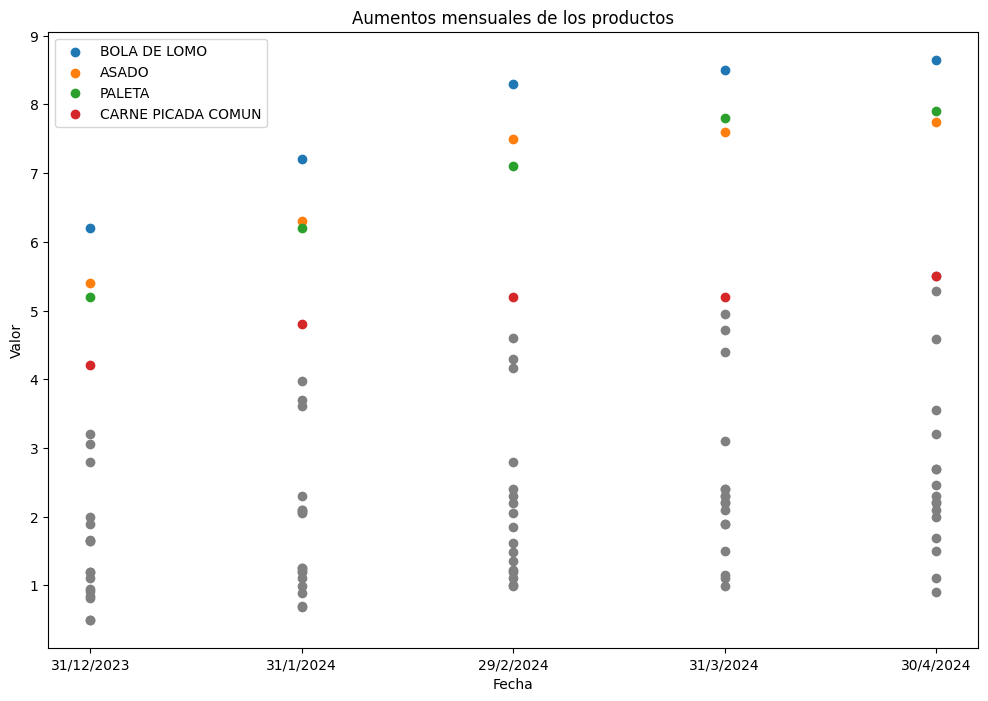

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Leer el archivo CSV
df = pd.read_csv("/work/consumidores_libres.csv", delimiter=';')
#Esta función lleva al equivalente a un gramo a todos los productos
def llevar_a_un_gramo(df):
    for indice, fila in df.iterrows():
        cantidad_original = fila['Cantidad']
        for columna in df.columns.difference(['Cantidad', 'PRODUCTOS']):
            # Dividir el valor original de la columna por la cantidad original
            df.at[indice, columna] /= cantidad_original
        # Asignar el valor 1 a la columna 'Cantidad'
        df.at[indice, 'Cantidad'] = 1
    return df


#Para mejorar la interpretación de este gráfico hicimos que al graficarlos, grafique todos los productos que no son carne con un color gris.cumple_margenes_oms
#y los que son carne con un distinto color.
def graficar_todos_productos(df):
    aumentos = llevar_a_un_gramo(df)

    columnas_fechas = aumentos.columns.difference(['PRODUCTOS', 'Cantidad'])
    columnas_fechas_sorted = sorted(columnas_fechas, key=lambda fecha: aumentos.columns.get_loc(fecha))
    
    # Carnes
    productos_distinguibles = ["BOLA DE LOMO", "PALETA", "CARNE PICADA COMUN", "ASADO"]
    #Otros productos
    otros_productos = 'gray'
    plt.figure(figsize=(12, 8))  
    ax = plt.gca()
    for indice, fila in aumentos.iterrows():
        producto = fila['PRODUCTOS']
        valores = fila[columnas_fechas_sorted].values
        if producto in productos_distinguibles:
            ax.scatter(columnas_fechas_sorted, valores, label=producto)
        else:
            ax.scatter(columnas_fechas_sorted, valores, color=otros_productos)

    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title('Aumentos mensuales de los productos')
    
    # Solo mostrar leyenda si hay productos etiquetados
    handles, labels = ax.get_legend_handles_labels()
    if any(label in productos_distinguibles for label in labels):
        plt.legend()
        
    plt.show()

graficar_todos_productos(df)



    
    

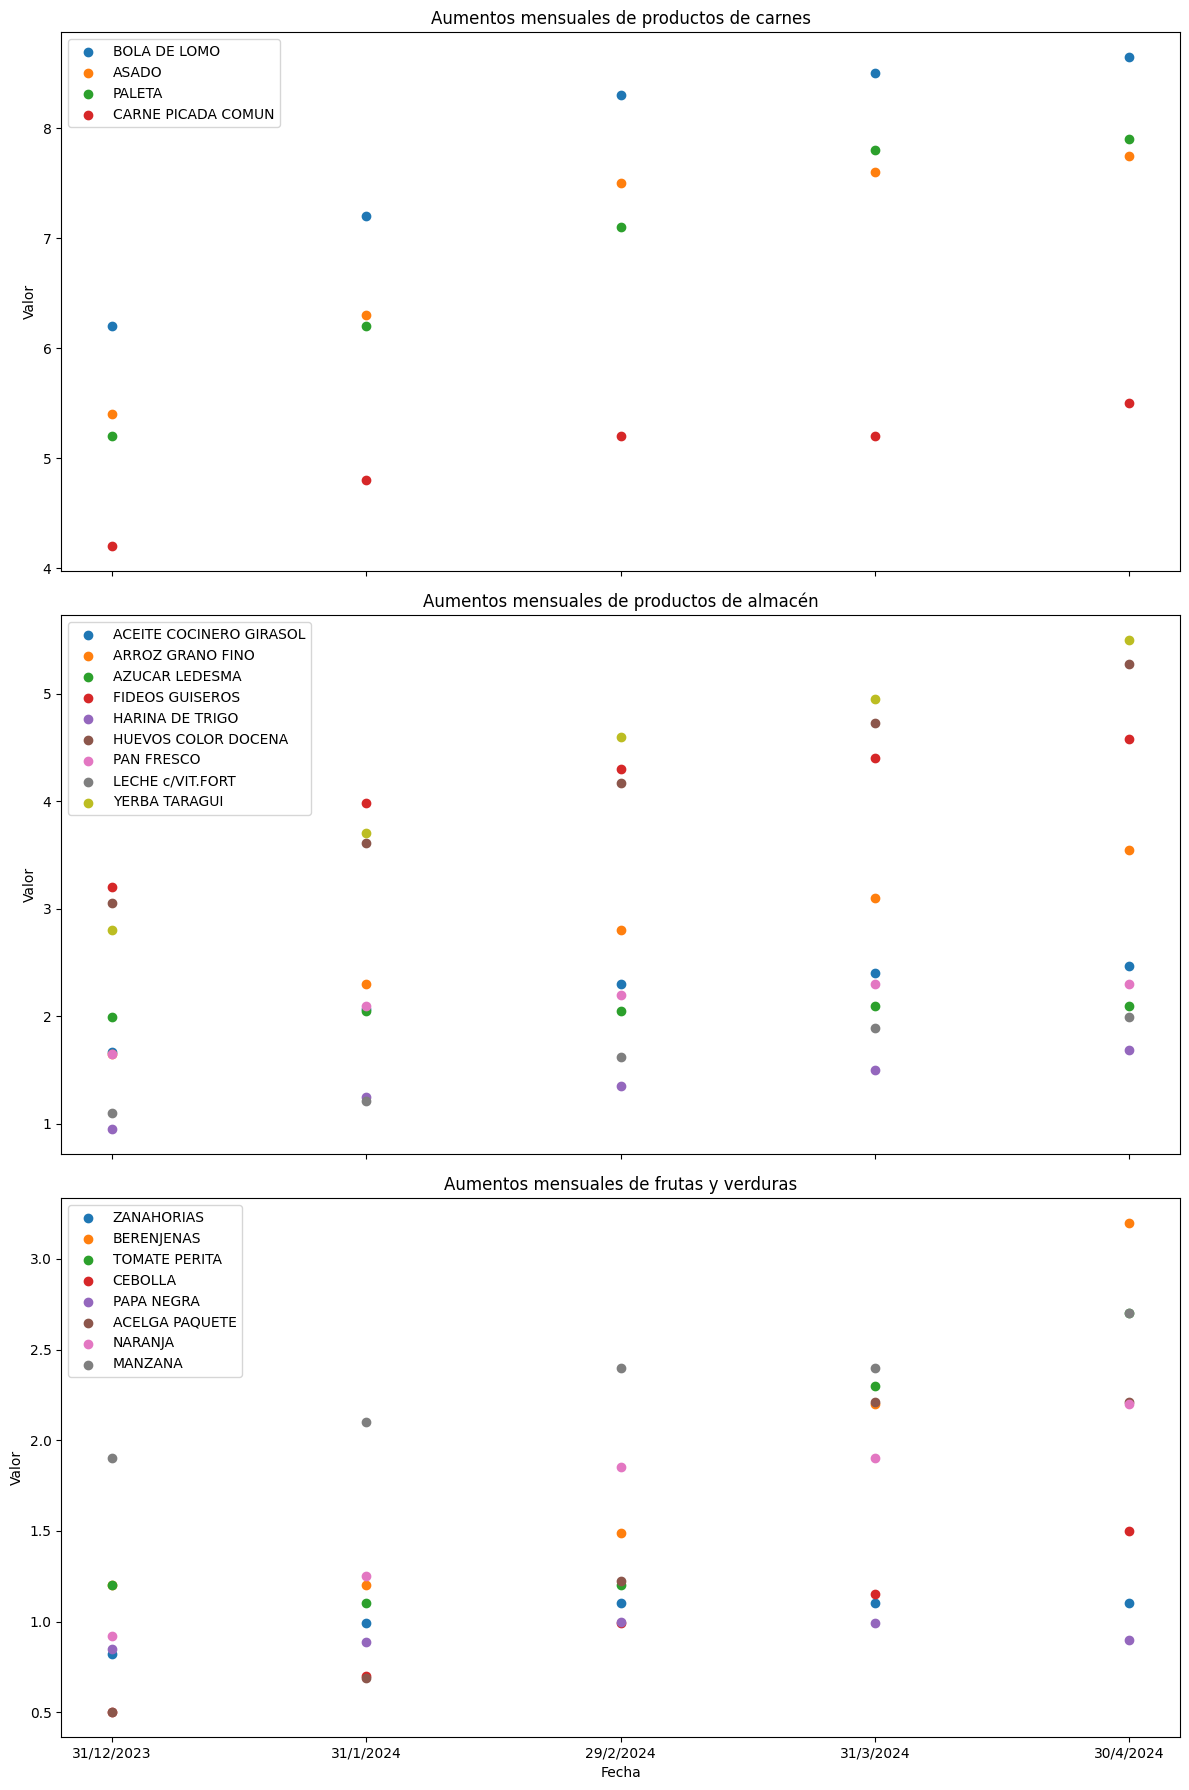

In [22]:
def graficar_todos_productos_separados(df):
    aumentos = llevar_a_un_gramo(df)

    columnas_fechas = aumentos.columns.difference(['PRODUCTOS', 'Cantidad'])
    columnas_fechas_sorted = sorted(columnas_fechas, key=lambda fecha: aumentos.columns.get_loc(fecha))
    
    productos_carnes_nombres = [
        "BOLA DE LOMO",
        "ASADO",
        "PALETA",
        "CARNE PICADA COMUN"
    ]

    productos_almacen_nombres = [
        "ACEITE COCINERO GIRASOL",
        "ARROZ GRANO FINO",
        "AZUCAR LEDESMA",
        "FIDEOS GUISEROS",
        "HARINA DE TRIGO",
        "HUEVOS COLOR DOCENA",
        "PAN FRESCO",
        "LECHE c/VIT.FORT",
        "YERBA TARAGUI"
    ]

    productos_frutas_verduras_nombres = [
        "ZANAHORIAS",
        "BERENJENAS",
        "TOMATE PERITA",
        "CEBOLLA",
        "PAPA NEGRA",
        "ACELGA PAQUETE",
        "NARANJA",
        "MANZANA"
    ]
    
    fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

    # Gráfico para productos de carnes
    ax = axs[0]
    for indice, fila in aumentos.iterrows():
        producto = fila['PRODUCTOS']
        valores = fila[columnas_fechas_sorted].values
        if producto in productos_carnes_nombres:
            ax.scatter(columnas_fechas_sorted, valores, label=producto)
    ax.set_title('Aumentos mensuales de productos de carnes')
    ax.set_ylabel('Valor')
    ax.legend()

    # Gráfico para productos de almacén
    ax = axs[1]
    for indice, fila in aumentos.iterrows():
        producto = fila['PRODUCTOS']
        valores = fila[columnas_fechas_sorted].values
        if producto in productos_almacen_nombres:
            ax.scatter(columnas_fechas_sorted, valores, label=producto)
    ax.set_title('Aumentos mensuales de productos de almacén')
    ax.set_ylabel('Valor')
    ax.legend()

    # Gráfico para productos de frutas y verduras
    ax = axs[2]
    for indice, fila in aumentos.iterrows():
        producto = fila['PRODUCTOS']
        valores = fila[columnas_fechas_sorted].values
        if producto in productos_frutas_verduras_nombres:
            ax.scatter(columnas_fechas_sorted, valores, label=producto)
    ax.set_title('Aumentos mensuales de frutas y verduras')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Valor')
    ax.legend()

    plt.tight_layout()
    plt.show()
graficar_todos_productos_separados(df)

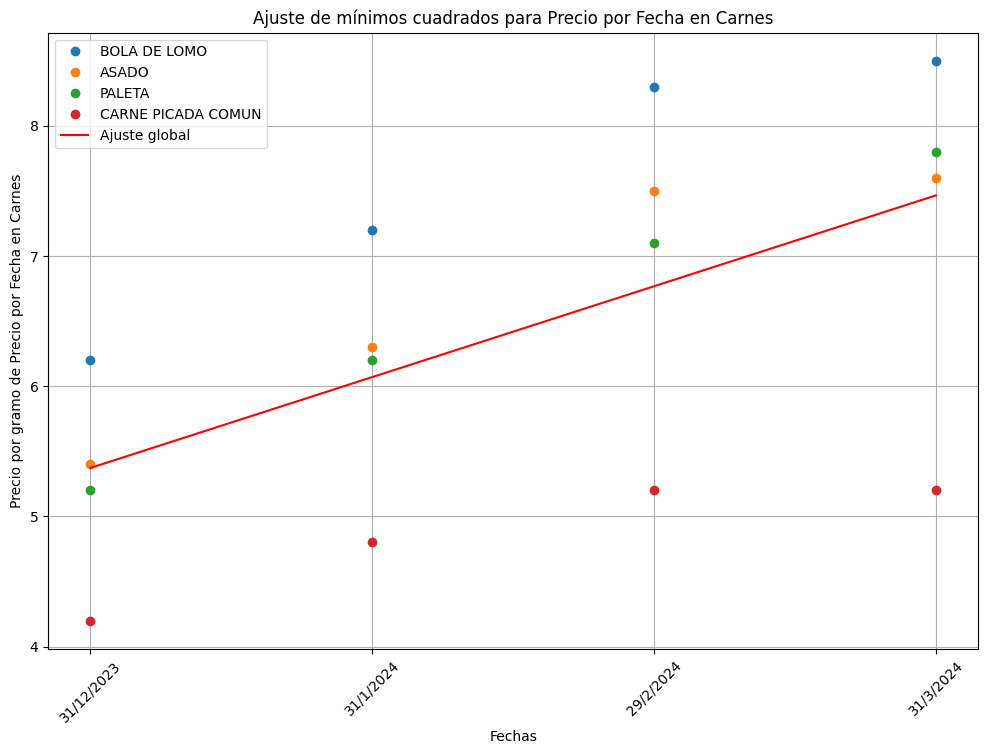

Pendiente de Precio por Fecha en Carnes: 0.6975000000000002


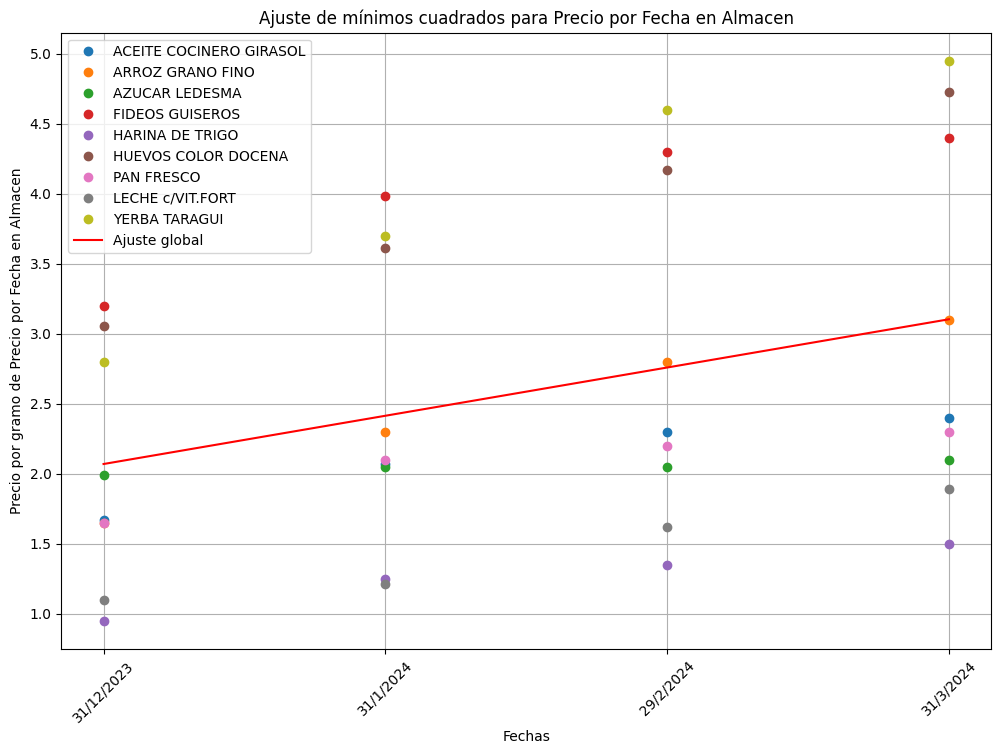

Pendiente de Precio por Fecha en Almacen: 0.34465432098765436


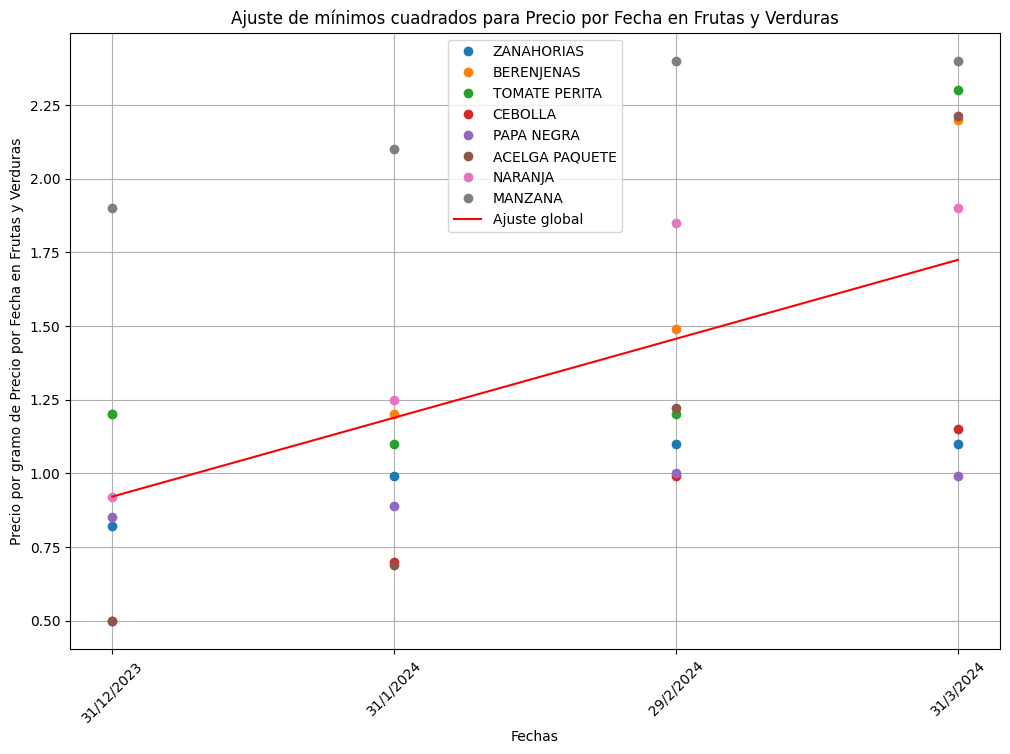

Pendiente de Precio por Fecha en Frutas y Verduras: 0.26770833333333344


In [23]:
#Separamos en 3 grupos: Carnes, Productos de almacen y frutas y verduras.
productos_carnes_nombres = [
        "BOLA DE LOMO",
        "ASADO",
        "PALETA",
        "CARNE PICADA COMUN"
    ]

productos_almacen_nombres = [
        "ACEITE COCINERO GIRASOL",
        "ARROZ GRANO FINO",
        "AZUCAR LEDESMA",
        "FIDEOS GUISEROS",
        "HARINA DE TRIGO",
        "HUEVOS COLOR DOCENA",
        "PAN FRESCO",
        "LECHE c/VIT.FORT",
        "YERBA TARAGUI"
    ]

productos_frutas_verduras_nombres = [
        "ZANAHORIAS",
        "BERENJENAS",
        "TOMATE PERITA",
        "CEBOLLA",
        "PAPA NEGRA",
        "ACELGA PAQUETE",
        "NARANJA",
        "MANZANA"
    ]
aumentos = llevar_a_un_gramo(df)    
df_carnes = aumentos[aumentos['PRODUCTOS'].isin(productos_carnes_nombres)].drop(columns=['Cantidad'])
df_almacen = aumentos[aumentos['PRODUCTOS'].isin(productos_almacen_nombres)].drop(columns=['Cantidad'])
df_frutas_verduras = aumentos[aumentos['PRODUCTOS'].isin(productos_frutas_verduras_nombres)].drop(columns=['Cantidad'])
# Aplicamos la función de ajuste por mínimos cuadrados a cada grupo
ajuste_minimos_cuadrados(df_carnes, "Precio por Fecha en Carnes")
ajuste_minimos_cuadrados(df_almacen, "Precio por Fecha en Almacen")
ajuste_minimos_cuadrados(df_frutas_verduras, "Precio por Fecha en Frutas y Verduras")

En este caso, separamos los alimentos en tres rubros: carnes, almacen, y frutas y verduras. El objetivo en este caso fue analizar los aumentos de cada rubro, junto a los precios generales. Para esto utilizamos la función de mínimos cuadrados de la consiga 5. Se puede observar que la pendiente en el gráfico de carnes es mayor a la de almacen, y más aún que la de las frutas y verduras. Además, obtuvimos que las frutas y verduras fueron el rubro con menor rapidez de aumentos por mes. Con esto es que podemos deducir que las carnes tuvieron una rapidez de aumento más grande, mientras que las frutas y verduras fueron el rubro que menos.

Cabe aclarar que se generalizaron estos rubros; hay cortes de carne más baratos y caros que otros y dependiendo de cuáles se quiera estudiar estos van a tener distintas pendientes al analizar sus aumentos. Lo mismo ocurre con los productos de almacen y verdulería.

Como se puede observar, la carne sigue siendo el alimento más caro. 

   Suponiendo entonces que el consumo de carne disminuyo en el porcentaje dado en la nota de Infobae, vamos a considerar una baja del 18% de carne en la ingesta diaria, y a continuación vamos a ver si mejoran los valores respecto a la tabla de metas de la OMS. La siguiente función le resta a las carnes (de las que sabemos el precio) un 18% de la cantidad total original. 

In [24]:
import pandas as pd

def reducir_carnes(df, carnes, porcentaje_reduccion):
    # Filtramos las filas de las carnes
    carnes_df = df[df['Alimento'].isin(carnes)].copy()
    
    
    cantidad_a_restar = carnes_df['Cantidad (gr/ml)'].sum() * (porcentaje_reduccion / 100)
    
    # Calcular la reducción equitativa por cada carne
    cantidad_por_carne = cantidad_a_restar / len(carnes)
    
    # Aplicar la reducción a cada carne
    for carne in carnes:
        # Obtener las filas correspondientes a la carne actual
        filas_carne = df[df['Alimento'] == carne]
        cantidad_original = filas_carne['Cantidad (gr/ml)']
        nueva_cantidad = cantidad_original - cantidad_por_carne
        
        # Aplicar la nueva cantidad
        df.loc[df['Alimento'] == carne, 'Cantidad (gr/ml)'] = nueva_cantidad
        
        # Ajustar las demás columnas proporcionalmente
        factor = nueva_cantidad / cantidad_original
        for columna in df.columns.difference(['Alimento', 'Cantidad (gr/ml)']):
            df.loc[df['Alimento'] == carne, columna] *= factor
    
    return df


df = data.copy()
carnes = ['Bola de Lomo', 'Paleta', 'Asado', 'Carne picada','Higado','Hueso c/carne']
porcentaje_reduccion = 18

df_reducido = reducir_carnes(df, carnes, porcentaje_reduccion)
df_reducido



,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370000,7.830000,0.153900,0.283500,0.000189,0.00,4.990000,2.190000,0.520000,0.00
1,Leche entera en polvo,11.00,4.510,2.840000,2.730000,0.044440,0.099000,0.000060,0.00,1.620000,0.770000,0.060000,0.00
2,Yogurt,19.00,2.450,0.510000,0.490000,0.007990,0.017670,0.000005,0.00,0.320000,0.140000,0.014000,0.00
3,Queso crema,1.66,0.060,0.100000,0.370000,0.001230,0.000930,0.000000,0.00,0.360000,0.110000,0.010000,0.00
4,Queso cuartirolo,3.66,0.060,0.770000,0.800000,0.020840,0.016540,0.000000,0.00,0.760000,0.210000,0.020000,0.00
5,Queso rallar,1.66,0.060,0.550000,0.450000,0.020420,0.015780,0.000000,0.00,0.360000,0.110000,0.008000,0.00
6,Huevo,16.00,0.000,1.920000,1.890000,0.021600,0.008960,0.000400,0.00,0.510000,0.720000,0.460000,0.00
7,Asado,45.95,0.000,8.546700,6.892500,0.030327,0.006893,0.001029,0.00,2.692670,3.005130,0.173691,0.00
8,Paleta,15.00,0.000,3.000000,1.500000,0.009900,0.001800,0.000340,0.00,0.880000,0.980000,0.056000,0.00
9,Hueso c/carne,10.95,0.000,2.190000,1.095000,0.007227,0.001314,0.000248,0.00,0.642400,0.715400,0.040880,0.00


Por último, testeamos este nuevo dataframe de la nueva ingesta diaria propuesta.

In [25]:
cumple_margenes_oms(df_reducido)


No cumple condición proteinas, ya que su porcentaje es 16.04
Cumple condición hc, ya que su porcentaje es 60.67
No cumple condición grasas, ya que su porcentaje es 11.14
No cumple condición na, ya que su cantidad es 3.32
No cumple condición fibra, ya que su cantidad es 21.26
Cumple condición frutas y verduras, ya que su cantidad es 673.00


'Falso, no cumple todos los margenes'

Como se puede ver, siguen sin cumplirse las metas. Sin embargo, se ve que el índice de proteínas mejoro, y se acerca al porcentaje que se buscaba. Esto no resulta inesperado, ya que por un lado se bajo la consumición de ciertas carnes (no todas), hay otros alimentos que también aportan mucha proteína y no fueron considerados como "carne". Nuestro criterio de "carne" se baso en carnes rojas, por lo que (por ejemplo) el pollo no fue considerado en esta disminución. 

### 

# Consigna 7

Criterio de resolución:

- Tomamos como alimentos con "valores nutricionales parecidos" a los alimentos que se encuentran en el mismo cluster del punto 3.

- En cuanto a la restricción presupuestaria, interpretamos que al referirse al "50% del aumento de la carne" se refiere que como presupuesto tenemos el 50% de lo que sale la carne actualmente. Sin embargo, nuestra resolución es aplicable para otras intepretaciones, ya que decidimos tomar como productos a la leche fluida entera y a la acelga (los mejores alimentos para reemplazar la perdida de proteína que cumplan con la condición de que sean más baratos).

A continuación, calculamos la cantidad de carne que debiamos quitar (el 18.5%). El resultado determino que entre todas las carnes había que restar 23.31 gramos.

In [26]:
import pandas as pd

# Lista de alimentos específicos de carne
alimentos_carne = ['Paleta', 'Bola de Lomo', 'Asado', 'Carne picada','Hígado','Hueso c/carne']

# Sumatoria de cantidad (gramos) para los alimentos específicos de carne
sumatoria_cantidad_carne = data[data['Alimento'].isin(alimentos_carne)]['Cantidad (gr/ml)'].sum()

# Cantidad de carne a quitar (18.5% de la cantidad total de los alimentos específicos de carne)
cantidad_carne_quitar = sumatoria_cantidad_carne * 0.185



# Imprimir los resultados
print(f"Sumatoria de cantidad total: {sumatoria_cantidad_carne:.2f} gr")
print(f"Cantidad de carne a quitar: {cantidad_carne_quitar:.2f} gr")


Sumatoria de cantidad total: 126.00 gr
Cantidad de carne a quitar: 23.31 gr


En la siguiente función reducimos el 18.5% de carne.

In [27]:
import pandas as pd

def reducir_el_porcentaje(df, carnes, porcentaje_reduccion):
    # Filtramos las filas de las carnes
    carnes_df = df[df['Alimento'].isin(carnes)].copy()
    
    
    cantidad_a_restar = carnes_df['Cantidad (gr/ml)'].sum() * (porcentaje_reduccion / 100)
    
    # Calculamos lo que reducimos equitativativamente por cada carne
    cantidad_por_carne = cantidad_a_restar / len(carnes)
    
    # Aplicamos la reducción 
    for carne in carnes:
        # Obtuvimos las filas correspondientes a la carne 
        filas_carne = df[df['Alimento'] == carne]
        cantidad_original = filas_carne['Cantidad (gr/ml)']
        nueva_cantidad = cantidad_original - cantidad_por_carne
        
        # Aplicamos la nueva cantidad
        df.loc[df['Alimento'] == carne, 'Cantidad (gr/ml)'] = nueva_cantidad
        
        # Ajustamos todas las otras columnas proporcionalmente
        factor = nueva_cantidad / cantidad_original
        for columna in df.columns.difference(['Alimento', 'Cantidad (gr/ml)']):
            df.loc[df['Alimento'] == carne, columna] *= factor
    
    return df


df = data.copy()
carnes = ['Bola de Lomo', 'Paleta', 'Asado', 'Carne picada','Hígado','Hueso c/carne']
porcentaje_reduccion = 18.5

carnes_con_porcentaje_restado = reducir_el_porcentaje(df, carnes, porcentaje_reduccion)
carnes_con_porcentaje_restado



,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.000,12.420,8.370000,7.830000,0.153900,0.283500,0.000189,0.00,4.990000,2.190000,0.520000,0.00
1,Leche entera en polvo,11.000,4.510,2.840000,2.730000,0.044440,0.099000,0.000060,0.00,1.620000,0.770000,0.060000,0.00
2,Yogurt,19.000,2.450,0.510000,0.490000,0.007990,0.017670,0.000005,0.00,0.320000,0.140000,0.014000,0.00
3,Queso crema,1.660,0.060,0.100000,0.370000,0.001230,0.000930,0.000000,0.00,0.360000,0.110000,0.010000,0.00
4,Queso cuartirolo,3.660,0.060,0.770000,0.800000,0.020840,0.016540,0.000000,0.00,0.760000,0.210000,0.020000,0.00
5,Queso rallar,1.660,0.060,0.550000,0.450000,0.020420,0.015780,0.000000,0.00,0.360000,0.110000,0.008000,0.00
6,Huevo,16.000,0.000,1.920000,1.890000,0.021600,0.008960,0.000400,0.00,0.510000,0.720000,0.460000,0.00
7,Asado,46.115,0.000,8.577390,6.917250,0.030436,0.006917,0.001033,0.00,2.702339,3.015921,0.174315,0.00
8,Paleta,15.000,0.000,3.000000,1.500000,0.009900,0.001800,0.000340,0.00,0.880000,0.980000,0.056000,0.00
9,Hueso c/carne,11.115,0.000,2.223000,1.111500,0.007336,0.001334,0.000252,0.00,0.652080,0.726180,0.041496,0.00


Para elegir los productos que vayan a reemplazar la carne, vamos a determinar el presupuesto: calculamos el precio promedio de las carnes actualmente y nos quedamos con el 50%.

In [28]:
def Promedio(df):
    productos_carne = ["BOLA DE LOMO", "PALETA", "ASADO", "CARNE PICADA COMUN"]
    columnas_fechas = df.columns.difference(['PRODUCTOS', 'Cantidad'])
    ultima_fecha = columnas_fechas[-1]
    sumatoria_carne = 0
    contador_carne = 0
    for indice, fila in df.iterrows():
        if fila['PRODUCTOS'] in productos_carne:
            sumatoria_carne += fila[ultima_fecha]
            contador_carne += 1
    
    
    promedio_carne = sumatoria_carne / contador_carne 
    
    
    
    resultados = {
        "Promedio de carne": promedio_carne,
          
    }
    
    return resultados

Promedio(aumentos_por_gramo)


{'Promedio de carne': 7.275}

In [29]:
aumentos_por_gramo

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1,1.666667,2.066667,2.300000,2.400000,2.466667
1,ARROZ GRANO FINO,1,1.650000,2.300000,2.800000,3.100000,3.550000
2,AZUCAR LEDESMA,1,1.990000,2.050000,2.050000,2.100000,2.100000
3,FIDEOS GUISEROS,1,3.200000,3.980000,4.300000,4.400000,4.580000
4,HARINA DE TRIGO,1,0.950000,1.250000,1.350000,1.500000,1.690000
5,HUEVOS COLOR DOCENA,1,3.055556,3.611111,4.166667,4.722222,5.277778
6,PAN FRESCO,1,1.650000,2.100000,2.200000,2.300000,2.300000
7,LECHE c/VIT.FORT,1,1.100000,1.210000,1.620000,1.890000,1.990000
8,YERBA TARAGUI,1,2.800000,3.700000,4.600000,4.950000,5.500000
9,ZANAHORIAS,1,0.820000,0.990000,1.100000,1.100000,1.100000


Como se puede ver, elegimos la leche fluida entera y la acelga porque cumplen con la restricción presupuestaria: el gramo sale menos que lo que sale el 50% de carnes por gramo.

Para ver cuánto porcentaje de proteínas y grasas hay que reponer, calculamos cuánto había de estos nutrientes en la tabla original y en la nueva.

In [30]:
df = data.copy()
print(df['Proteinas (gr)'].sum())
print(df['Grasas (gr)'].sum()) 

112.41299999999998
76.911


In [31]:
df = carnes_con_porcentaje_restado
print(df['Proteinas (gr)'].sum())
print(df['Grasas (gr)'].sum()) 

109.31254147058823
75.49640294117646


Con estos calculos obtuvimos que hay que reponer 3 gramos de proteína y 1.5 gramos de grasas.

In [32]:
nutrientes_por_gramo

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (mg),Ca (mg),Fe (mg),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,LECHE c/VIT.FORT,1.0,0.046000,0.031000,0.029000,0.570000,1.050000,0.000700,NaN,0.018481,0.008111,0.001926,NaN
1,Leche entera en polvo,1.0,0.410000,0.258182,0.248182,4.040000,9.000000,0.005455,NaN,0.147273,0.070000,0.005455,NaN
2,Yogurt,1.0,0.128947,0.026842,0.025789,0.420526,0.930000,0.000263,NaN,0.016842,0.007368,0.000737,NaN
3,Queso crema,1.0,0.036145,0.060241,0.222892,0.740964,0.560241,NaN,NaN,0.216867,0.066265,0.006024,NaN
4,Queso cuartirolo,1.0,0.016393,0.210383,0.218579,5.693989,4.519126,NaN,NaN,0.207650,0.057377,0.005464,NaN
5,Queso rallar,1.0,0.036145,0.331325,0.271084,12.301205,9.506024,NaN,NaN,0.216867,0.066265,0.004819,NaN
6,HUEVOS COLOR DOCENA,1.0,NaN,0.120000,0.118125,1.350000,0.560000,0.025000,NaN,0.031875,0.045000,0.028750,NaN
7,ASADO,1.0,NaN,0.186000,0.150000,0.660000,0.150000,0.022400,NaN,0.058600,0.065400,0.003780,NaN
8,PALETA,1.0,NaN,0.200000,0.100000,0.660000,0.120000,0.022667,NaN,0.058667,0.065333,0.003733,NaN
9,Hueso c/carne,1.0,NaN,0.200000,0.100000,0.660000,0.120000,0.022667,NaN,0.058667,0.065333,0.003733,NaN


Con esta tabla podemos obtener cuántos gramos hay que sumar de cada alimento propuesto: 

Si 1 gramo de acelga contiene 0.0292 gramos de proteína y nada de grasa

Si 1 gramo de leche fluida entera tiene 0.258 gramos de proteína y 0.248 de grasa

Con la función siguiente, al probar con varios valores distintos llegamos a que para reponer la cantidad de proteínas y grasas perdidas, hay que sumar 53 gramos de acelga y 50 de leche fluida entera; y los agregamos.

In [33]:
# Actualizamos la cantidad de 'acelga'
df_con_acelga = carnes_con_porcentaje_restado.copy()
df_con_acelga.loc[df_con_acelga['Alimento'] == 'Acelga', 'Cantidad (gr/ml)'] += 53

# Obtuvimos la nueva cantidad total de 'acelga'
nueva_cantidad_total = df_con_acelga.loc[df_con_acelga['Alimento'] == 'Acelga', 'Cantidad (gr/ml)'].values[0]

# Ajustamos proporcionalmente las demás columnas
columnas_ajustar = ['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 'Na (gr)', 'Ca (gr)', 'Fe (gr)',
                    'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)', 'Fibra (gr)']

for columna in columnas_ajustar:
    df_con_acelga.loc[df_con_acelga['Alimento'] == 'Acelga', columna] *= nueva_cantidad_total / (nueva_cantidad_total - 53)


# Hicimos lo mismo pero para sumar ahora la leche

df_con_acelga_y_leche = df_con_acelga.copy()
df_con_acelga_y_leche.loc[df_con_acelga_y_leche['Alimento'] == 'Leche fluida entera', 'Cantidad (gr/ml)'] += 50

# Con esto obtuvimos la nueva cantidad total de 'Leche fluida entera'
nueva_cantidad_total = df_con_acelga_y_leche.loc[df_con_acelga_y_leche['Alimento'] == 'Leche fluida entera', 'Cantidad (gr/ml)'].values[0]

# Ajustamos proporcionalmente las demás columnas
columnas_ajustar = ['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 'Na (gr)', 'Ca (gr)', 'Fe (gr)',
                    'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)', 'Fibra (gr)']

for columna in columnas_ajustar:
    df_con_acelga_y_leche.loc[df_con_acelga_y_leche['Alimento'] == 'Leche fluida entera', columna] *= nueva_cantidad_total / (nueva_cantidad_total - 50)


df_con_acelga_y_leche


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,320.000,14.720,9.920000,9.280000,0.182400,0.336000,0.000224,0.00,5.914074,2.595556,0.616296,0.000
1,Leche entera en polvo,11.000,4.510,2.840000,2.730000,0.044440,0.099000,0.000060,0.00,1.620000,0.770000,0.060000,0.000
2,Yogurt,19.000,2.450,0.510000,0.490000,0.007990,0.017670,0.000005,0.00,0.320000,0.140000,0.014000,0.000
3,Queso crema,1.660,0.060,0.100000,0.370000,0.001230,0.000930,0.000000,0.00,0.360000,0.110000,0.010000,0.000
4,Queso cuartirolo,3.660,0.060,0.770000,0.800000,0.020840,0.016540,0.000000,0.00,0.760000,0.210000,0.020000,0.000
5,Queso rallar,1.660,0.060,0.550000,0.450000,0.020420,0.015780,0.000000,0.00,0.360000,0.110000,0.008000,0.000
6,Huevo,16.000,0.000,1.920000,1.890000,0.021600,0.008960,0.000400,0.00,0.510000,0.720000,0.460000,0.000
7,Asado,46.115,0.000,8.577390,6.917250,0.030436,0.006917,0.001033,0.00,2.702339,3.015921,0.174315,0.000
8,Paleta,15.000,0.000,3.000000,1.500000,0.009900,0.001800,0.000340,0.00,0.880000,0.980000,0.056000,0.000
9,Hueso c/carne,11.115,0.000,2.223000,1.111500,0.007336,0.001334,0.000252,0.00,0.652080,0.726180,0.041496,0.000


In [34]:
df = df_con_acelga_y_leche 
print(df['Proteinas (gr)'].sum())
print(df['Grasas (gr)'].sum())

112.41014147058823
76.94640294117647


In [35]:
cumple_margenes_oms(df_con_acelga_y_leche)

No cumple condición proteinas, ya que su porcentaje es 16.41
Cumple condición hc, ya que su porcentaje es 60.22
No cumple condición grasas, ya que su porcentaje es 11.23
No cumple condición na, ya que su cantidad es 3.48
No cumple condición fibra, ya que su cantidad es 22.11
Cumple condición frutas y verduras, ya que su cantidad es 726.00


'Falso, no cumple todos los margenes'

Como se puede ver, sigue sin cumplirse la meta de la OMS y los valores de proteínas y grasas dan prácticamente iguales.

# Consigna 8

Primero, calculamos la cantidad de proteinas que perdemos al quitar el 18,5% de la cantidad de carne.

In [36]:
import pandas as pd

# Lista de alimentos específicos de carne
alimentos_carne = ['Paleta', 'Bola de Lomo', 'Asado', 'Carne picada','Hueso c/carne', 'Higado']

# Sumatoria de proteínas para todo el dataframe
sumatoria_proteinas_total = data['Proteinas (gr)'].sum()

# Sumatoria de proteínas para los alimentos específicos de carne
sumatoria_proteinas_carne = data[data['Alimento'].isin(alimentos_carne)]['Proteinas (gr)'].sum()

# Sumatoria de cantidad (gramos) para los alimentos específicos de carne
sumatoria_cantidad_carne = data[data['Alimento'].isin(alimentos_carne)]['Cantidad (gr/ml)'].sum()

# Cantidad de carne a quitar (18.5% de la cantidad total de los alimentos específicos de carne)
cantidad_carne_quitar = sumatoria_cantidad_carne * 0.185

# Cantidad de proteínas perdidas (asumiendo una proporción directa entre la cantidad de carne y proteínas)
proteinas_perdidas = sumatoria_proteinas_carne * 0.185

# Imprimir los resultados
print(f"Sumatoria de proteínas total: {sumatoria_proteinas_total:.2f} gr")
print(f"Sumatoria de proteínas de los alimentos específicos de carne: {sumatoria_proteinas_carne:.2f} gr")
print(f"Cantidad de proteínas perdidas al quitar el 18.5% de gramos de carne: {proteinas_perdidas:.2f} gr")


Sumatoria de proteínas total: 112.41 gr
Sumatoria de proteínas de los alimentos específicos de carne: 26.68 gr
Cantidad de proteínas perdidas al quitar el 18.5% de gramos de carne: 4.94 gr


Al analizar la tabla "Nutrientes", generada en la consigna 5, donde se puede ver la cantidad de proteína que hay en un gramo de cada alimento, con los clusters generados en la consigna 3, determinamos que para reemplazar el 18,5% del consumo de la carne sin que se pierda proteína se puede aumentar el consumo de la "Leche entera en polvo" y de las "Galletitas saladas". Estos dos alimentos fueron elegidos porque son los que más proteína tienen por gramo dentro de los que no se encuentran en el mismo cluster que las carnes.

### Cuanto debo agregar en el caso de leche en polvo para reemplazar la proteina perdida

ya habiamos moificado anteriormente el dataframe con el procentaje de carnes restado equitativamente en las mismas, en el llamado 'carnes_con_porcentaje_restado'  asi que la utilizamos.

Calculamos la cantidad de leche en polvo entera que deberiamos agregar a la dieta para recuperar la proteina perdida al sacar el 18,5% de la cantidad de carne .

In [37]:
#Saco la proteina por gramo de leche que ya la teniamos en la tabla nutrientes_por_gramo
# Cantidad de 'Leche entera en polvo' necesaria para reemplazar las proteínas perdidas
proteinas_por_gramo_leche = nutrientes_por_gramo.loc[nutrientes_por_gramo['Alimento'] == 'Leche entera en polvo', 'Proteinas (gr)'].values[0]

# Calcular la cantidad de proteínas perdidas que necesitamos reemplazar
proteinas_perdidas_a_reemplazar = proteinas_perdidas

# Calcular la cantidad de 'Leche entera en polvo' necesaria para reemplazar las proteínas perdidas
cantidad_leche_ent_polv_a_agregar = proteinas_perdidas_a_reemplazar / proteinas_por_gramo_leche

print(f"Cantidad de Leche entera en polvo a agregar: {cantidad_leche_ent_polv_a_agregar:.2f} gramos")

Cantidad de Leche entera en polvo a agregar: 19.12 gramos


Una vez calculado, armamos un dataframe que me modifique el que ya tenia restado la cantidad de carne y le agregue la cantidad de leche en polvo entera necesaria recientemente calculada.

In [38]:
# Actualizar la cantidad de 'Leche entera en polvo'
tabla_con_leche = carnes_con_porcentaje_restado.copy()
tabla_con_leche.loc[tabla_con_leche['Alimento'] == 'Leche entera en polvo', 'Cantidad (gr/ml)'] += cantidad_leche_ent_polv_a_agregar

# Obtener la nueva cantidad total de 'Leche entera en polvo'
nueva_cantidad_total = tabla_con_leche.loc[tabla_con_leche['Alimento'] == 'Leche entera en polvo', 'Cantidad (gr/ml)'].values[0]

# Ajustar proporcionalmente las demás columnas
columnas_ajustar = ['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 'Na (gr)', 'Ca (gr)', 'Fe (gr)',
                    'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)', 'Fibra (gr)']

for columna in columnas_ajustar:
    tabla_con_leche.loc[tabla_con_leche['Alimento'] == 'Leche entera en polvo', columna] *= nueva_cantidad_total / (nueva_cantidad_total - cantidad_leche_ent_polv_a_agregar)

# Mostrar el dataframe actualizado
tabla_con_leche

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.000000,12.420000,8.370000,7.830000,0.153900,0.283500,0.000189,0.00,4.990000,2.190000,0.520000,0.00
1,Leche entera en polvo,30.117535,12.348189,7.775800,7.474625,0.121675,0.271058,0.000164,0.00,4.435492,2.108227,0.164277,0.00
2,Yogurt,19.000000,2.450000,0.510000,0.490000,0.007990,0.017670,0.000005,0.00,0.320000,0.140000,0.014000,0.00
3,Queso crema,1.660000,0.060000,0.100000,0.370000,0.001230,0.000930,0.000000,0.00,0.360000,0.110000,0.010000,0.00
4,Queso cuartirolo,3.660000,0.060000,0.770000,0.800000,0.020840,0.016540,0.000000,0.00,0.760000,0.210000,0.020000,0.00
5,Queso rallar,1.660000,0.060000,0.550000,0.450000,0.020420,0.015780,0.000000,0.00,0.360000,0.110000,0.008000,0.00
6,Huevo,16.000000,0.000000,1.920000,1.890000,0.021600,0.008960,0.000400,0.00,0.510000,0.720000,0.460000,0.00
7,Asado,46.115000,0.000000,8.577390,6.917250,0.030436,0.006917,0.001033,0.00,2.702339,3.015921,0.174315,0.00
8,Paleta,15.000000,0.000000,3.000000,1.500000,0.009900,0.001800,0.000340,0.00,0.880000,0.980000,0.056000,0.00
9,Hueso c/carne,11.115000,0.000000,2.223000,1.111500,0.007336,0.001334,0.000252,0.00,0.652080,0.726180,0.041496,0.00


Luego corroboramos como varian los objetivos de la OMS con los datos que hermos cambiado. Siguen sin cumplirse en este caso.

In [39]:
cumple_margenes_oms(tabla_con_leche)

No cumple condición proteinas, ya que su porcentaje es 16.44
Cumple condición hc, ya que su porcentaje es 60.16
No cumple condición grasas, ya que su porcentaje es 11.55
No cumple condición na, ya que su cantidad es 3.40
No cumple condición fibra, ya que su cantidad es 21.26
Cumple condición frutas y verduras, ya que su cantidad es 673.00


'Falso, no cumple todos los margenes'

### Cuanto debo agregar en el caso de Galletitas saladas para reemplazar la proteina perdida

In [40]:
# Proteínas por gramo de Galletitas saladas 
proteinas_por_gramo_galletitas = nutrientes_por_gramo.loc[nutrientes_por_gramo['Alimento'] == 'Galletitas saladas', 'Proteinas (gr)'].values[0]

# Calcular la cantidad de 'Galletitas saladas' necesaria para reemplazar las proteínas perdidas
cantidad_galletitas_saladas_a_agregar = proteinas_perdidas_a_reemplazar / proteinas_por_gramo_galletitas

print(f"Cantidad de Galletitas saladas a agregar: {cantidad_galletitas_saladas_a_agregar:.2f} gramos")

Cantidad de Galletitas saladas a agregar: 36.67 gramos


Una vez calculada la cantidad de galletitas saladas que deberia agregar a la dieta para que me recupere las proteinas perdidas por la carne, modifico el dataframe con esa cantidad asi puedo ver si cumple los margenes de la OMS.

In [41]:
tabla_con_galletitas = carnes_con_porcentaje_restado.copy()

# Actualizar la cantidad de 'Galletitas saladas'
tabla_con_galletitas.loc[tabla_con_galletitas['Alimento'] == 'Galletitas saladas', 'Cantidad (gr/ml)'] += cantidad_galletitas_saladas_a_agregar  # Sumar la cantidad de galletitas saladas a agregar

# Obtener la nueva cantidad total de 'Galletitas saladas'
nueva_cantidad_total = tabla_con_galletitas.loc[tabla_con_galletitas['Alimento'] == 'Galletitas saladas', 'Cantidad (gr/ml)'].values[0]  # Obtener la nueva cantidad total de galletitas saladas

# Ajustar proporcionalmente las demás columnas
columnas_ajustar = ['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 'Na (gr)', 'Ca (gr)', 'Fe (gr)',
                    'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)', 'Fibra (gr)']

for columna in columnas_ajustar:
    # Ajustar cada columna proporcionalmente
    tabla_con_galletitas.loc[tabla_con_galletitas['Alimento'] == 'Galletitas saladas', columna] *= nueva_cantidad_total / (nueva_cantidad_total - cantidad_galletitas_saladas_a_agregar)

# Mostrar el dataframe actualizado
tabla_con_galletitas

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.000000,12.420000,8.370000,7.830000,0.153900,0.283500,0.000189,0.00,4.990000,2.190000,0.520000,0.000000
1,Leche entera en polvo,11.000000,4.510000,2.840000,2.730000,0.044440,0.099000,0.000060,0.00,1.620000,0.770000,0.060000,0.000000
2,Yogurt,19.000000,2.450000,0.510000,0.490000,0.007990,0.017670,0.000005,0.00,0.320000,0.140000,0.014000,0.000000
3,Queso crema,1.660000,0.060000,0.100000,0.370000,0.001230,0.000930,0.000000,0.00,0.360000,0.110000,0.010000,0.000000
4,Queso cuartirolo,3.660000,0.060000,0.770000,0.800000,0.020840,0.016540,0.000000,0.00,0.760000,0.210000,0.020000,0.000000
5,Queso rallar,1.660000,0.060000,0.550000,0.450000,0.020420,0.015780,0.000000,0.00,0.360000,0.110000,0.008000,0.000000
6,Huevo,16.000000,0.000000,1.920000,1.890000,0.021600,0.008960,0.000400,0.00,0.510000,0.720000,0.460000,0.000000
7,Asado,46.115000,0.000000,8.577390,6.917250,0.030436,0.006917,0.001033,0.00,2.702339,3.015921,0.174315,0.000000
8,Paleta,15.000000,0.000000,3.000000,1.500000,0.009900,0.001800,0.000340,0.00,0.880000,0.980000,0.056000,0.000000
9,Hueso c/carne,11.115000,0.000000,2.223000,1.111500,0.007336,0.001334,0.000252,0.00,0.652080,0.726180,0.041496,0.000000


Luego corroboramos como varian los objetivos de la OMS con los datos que hermos cambiado. Siguen sin cumplirse en este otro caso tampoco.

In [42]:
cumple_margenes_oms(tabla_con_galletitas)

No cumple condición proteinas, ya que su porcentaje es 16.08
Cumple condición hc, ya que su porcentaje es 60.83
No cumple condición grasas, ya que su porcentaje es 11.42
No cumple condición na, ya que su cantidad es 3.45
No cumple condición fibra, ya que su cantidad es 21.99
Cumple condición frutas y verduras, ya que su cantidad es 673.00


'Falso, no cumple todos los margenes'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da20217b-99d3-4dd9-8e96-7f12f49adc90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>